In [1]:
#manipulate the periodogram of an oscillating star

In [2]:
import lightkurve as lk
%matplotlib inline

In [3]:
lk.search_lightcurve('HD 42608', mission='TESS')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,37498433,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,37498433,0.0
2,TESS Sector 06,2018,QLP,1800,37498433,0.0
3,TESS Sector 06,2018,TASOC,120,37498433,0.0
4,TESS Sector 06,2018,CDIPS,1800,37498433,0.0
5,TESS Sector 06,2018,GSFC-ELEANOR-LITE,1800,37498433,0.0
6,TESS Sector 06,2018,TASOC,1800,37498433,0.0
7,TESS Sector 06,2018,TASOC,1800,37498433,0.0
8,TESS Sector 33,2020,SPOC,120,37498433,0.0


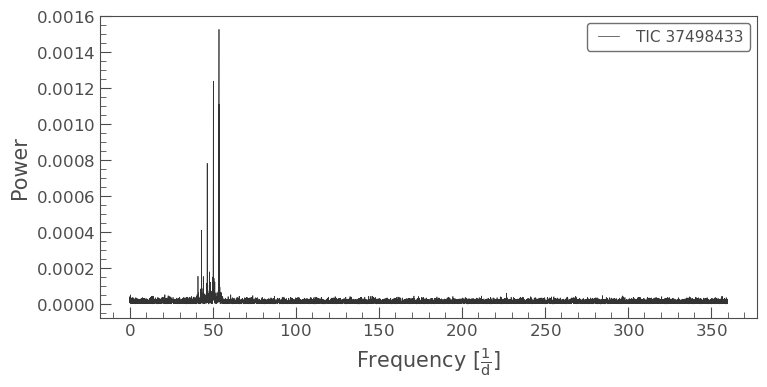

In [4]:
lc = lk.search_lightcurve('HD 42608', mission='TESS', author='SPOC', sector=6).download()
pg = lc.normalize().to_periodogram() #Periodogram of delta-scuti oscillator
pg.plot();

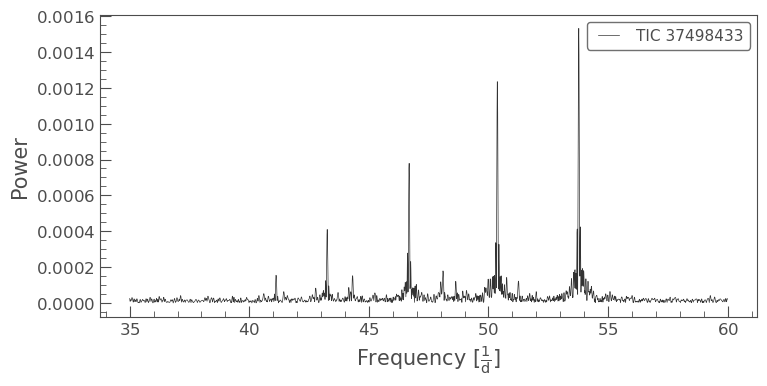

In [5]:
pg = lc.normalize().to_periodogram(minimum_frequency=35,
                                   maximum_frequency=60)
pg.plot();

In [7]:
search_result = lk.search_lightcurve('KIC 10963065', author='Kepler', cadence="long") #solar-like oscillator
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr010963065,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr010963065,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr010963065,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr010963065,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr010963065,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr010963065,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr010963065,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr010963065,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr010963065,0.0


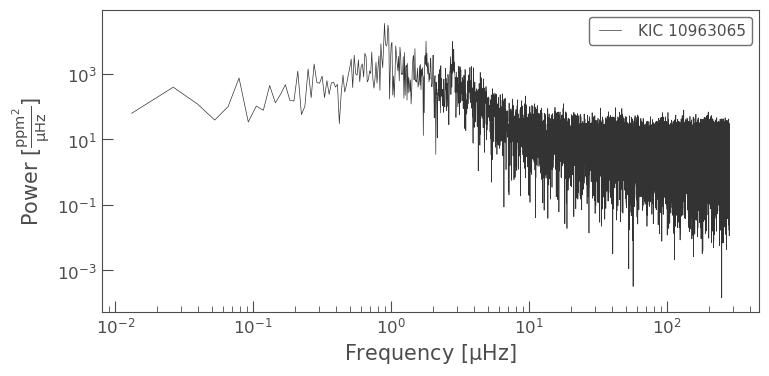

In [8]:
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
#pg = lc.to_periodogram(normalization='psd')
pg.plot(scale='log');

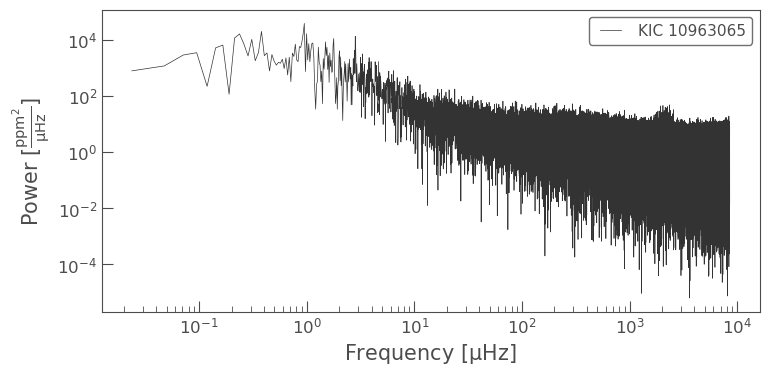

In [9]:
search_result = lk.search_lightcurve('KIC 10963065',
                                     mission='Kepler',
                                     cadence='short')
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
pg.plot(scale='log');

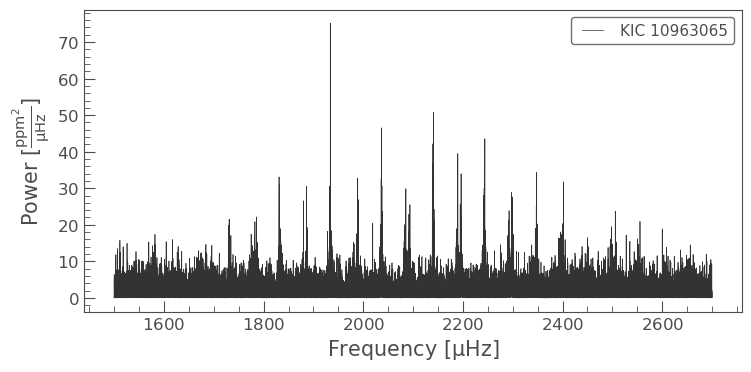

In [10]:
zoom_pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd',
                                                  minimum_frequency=1500,
                                                  maximum_frequency=2700)
zoom_pg.plot();

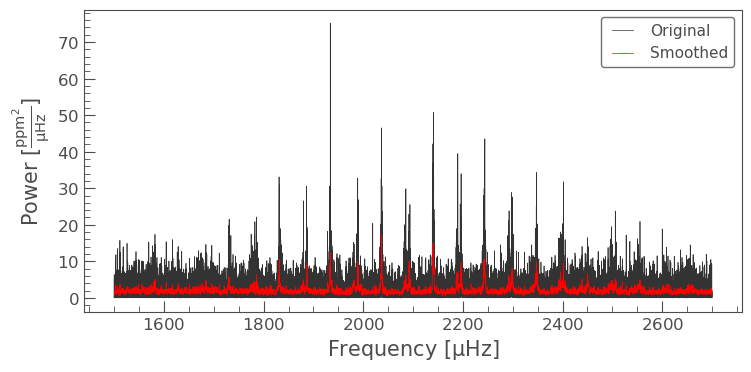

In [11]:
#Smoothing and Detrending(Analysing data other than long term trends) a Periodogram
smooth_pg = zoom_pg.smooth(method='boxkernel', filter_width=0.5) #applying boxkernel filter for smoothing
ax = zoom_pg.plot(label='Original')
smooth_pg.plot(ax=ax, color='red', label='Smoothed');

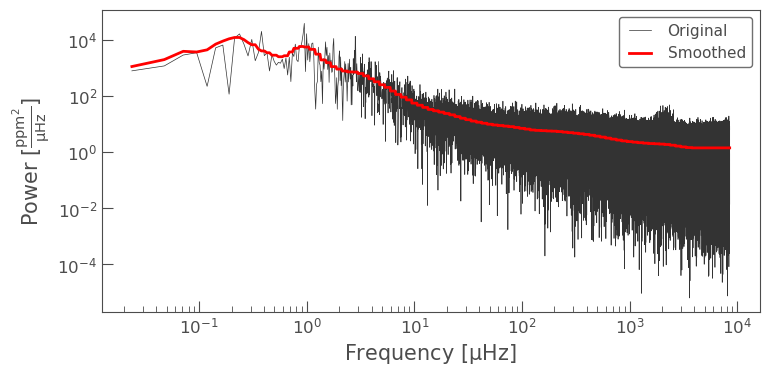

In [12]:
smooth_pg = pg.smooth(method='logmedian', filter_width=0.1) #trying smoothing with logmedian filter
ax = pg.plot(label='Original')
smooth_pg.plot(ax=ax, linewidth=2,  color='red', label='Smoothed', scale='log');